In [66]:
import os
os.chdir('/home/victorhuang/projects/gtx')

import numpy as np
import mat73
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from numerical.op_props_util import extrapolate_opt_prop

In [2]:
# Spatial frequency
fx = [0, 0.05, 0.1, 0.15, 0.2, 0.25] 
fx = np.array(fx)

dt_data_path = 'data/20241118_data_splited.mat'
phantom_data_path = 'data/phantom_data.mat'
cylinder_data_path_r1 = 'data/cylinder/h1_r5_d0.mat'
cylinder_data_path_r2 = 'data/cylinder/h1_r4_d2.mat'  

# Data

## DT data

In [3]:
# def load_dt_data(file_path):
#     data = sio.loadmat(file_path)
    
#     data = {k: v for k, v in data.items() if not k.startswith('__')}

#     return data

# all_data = load_dt_data('data/20241118_data_splited.mat')

# test_data = {
#     'fluorescence': all_data['test_fluorescence'],
#     'optical_props': all_data['test_optical_props'],
#     'reflectance': all_data['test_reflectance'],
#     'depth': all_data['test_depth'],
#     'concentration': all_data['test_concentration_fluor']
# }

# idx = 0
# sample_dt_data = {
#     'fluorescence': test_data['fluorescence'][idx, :, :, :],
#     'optical_props': test_data['optical_props'][idx, :, :, :],
#     'reflectance': test_data['reflectance'][idx, :, :, :],
#     'depth': test_data['depth'][idx, :, :],
#     'concentration': test_data['concentration'][idx, :, :]
# }



## Phantom data

In [4]:
def load_phantom_data(file_path):
    mat_data = mat73.loadmat(file_path)
    return mat_data

temp_data = load_phantom_data(phantom_data_path)
phantom_data = {
    'fluorescence': temp_data['F'],
    'optical_props': temp_data['OP'],
    'reflectance': temp_data['RE'],
    'depth': temp_data['DF'],
    'concentration': temp_data['QF']
}

idx=0
sample_phantom_data = {
    'fluorescence': phantom_data['fluorescence'][idx, :, :, :],
    'optical_props': phantom_data['optical_props'][idx, :, :, :],
    'reflectance': phantom_data['reflectance'][idx, :, :, :],
    'depth': phantom_data['depth'][idx, :, :],
    'concentration': phantom_data['concentration'][idx, :, :]
}


## Cylinder data

In [5]:
def load_cylinder_data(file_path):
    data = mat73.loadmat(file_path)
    return data

temp_data = load_cylinder_data(cylinder_data_path_r1)
sample_cylinder_data_r1 = {
    'fluorescence': temp_data['F'],
    'optical_props': temp_data['OP'],
    'reflectance': temp_data['RE'],
    'depth': temp_data['DF'],
    'concentration': temp_data['QF']
}

temp_data = load_cylinder_data(cylinder_data_path_r2)
sample_cylinder_data_r2 = {
    'fluorescence': temp_data['F'],
    'optical_props': temp_data['OP'],
    'reflectance': temp_data['RE'],
    'depth': temp_data['DF'],
    'concentration': temp_data['QF']
}

# Stats

In [6]:
def check_stats(data, idx=2, type='cylinder'):
    if type == 'cylinder':
        mu_a = data['optical_props'][:, :, 0]
        mu_sp = data['optical_props'][:, :, 1]
    elif type == 'phantom': # idx < 36
        mu_a = data['optical_props'][idx, :, :, 0]
        mu_sp = data['optical_props'][idx, :, :, 1]
    elif type == 'dt': # idx < 10000
        mu_a = data['optical_props'][idx, :, :, 0]
        mu_sp = data['optical_props'][idx, :, :, 1]
    else:
        raise ValueError(f'Invalid type: {type}')
    
    min_mu_a = np.min(mu_a)
    min_mu_sp = np.min(mu_sp)
    
    max_mu_a = np.max(mu_a)
    max_mu_sp = np.max(mu_sp)

    mean_mu_a = np.mean(mu_a)
    mean_mu_sp = np.mean(mu_sp)
    
    print(f'min_mu_a: {min_mu_a}, min_mu_sp: {min_mu_sp}')
    print(f'max_mu_a: {max_mu_a}, max_mu_sp: {max_mu_sp}')
    print(f'mean_mu_a: {mean_mu_a}, mean_mu_sp: {mean_mu_sp}')
    
check_stats(sample_cylinder_data_r1, type='cylinder')

min_mu_a: 0.003618305316194892, min_mu_sp: 0.9758068323135376
max_mu_a: 0.006319323088973761, max_mu_sp: 1.0263750553131104
mean_mu_a: 0.004545486532151699, mean_mu_sp: 0.9999879598617554


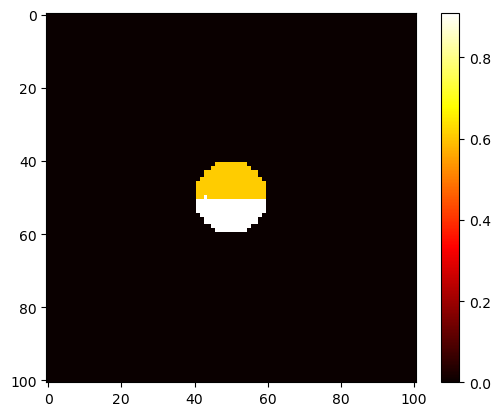

In [7]:
def draw_img(data, type='depth', data_type='cylinder'):
    if type == 'depth':
        data = data['depth']
    elif type == 'concentration':
        data = data['concentration']
    elif type == 'fluorescence':
        data = data['fluorescence']
    elif type == 'reflectance':
        data = data['reflectance']
    elif type == 'optical_props':
        data = data['optical_props']
    else:
        raise ValueError(f'Invalid type: {type}')
    
    if data_type == 'cylinder': # 3 dim
        data = data
    elif data_type == 'phantom':
        data = data
    elif data_type == 'dt':
        data = data
    else:
        raise ValueError(f'Invalid data_type: {data_type}')
    
    if type == 'fluorescence' or type == 'reflectance':
        fig, axs = plt.subplots(1, 6, figsize=(10, 5))
        for i in range(6):
            axs[i].imshow(data[:, :, i], cmap='hot', interpolation='nearest')
            axs[i].axis('off')
        plt.show()
    elif type == 'optical_props':
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(data[:, :, 0], cmap='hot', interpolation='nearest')
        axs[0].set_title('mu_a')
        axs[0].axis('off')
        axs[1].imshow(data[:, :, 1], cmap='hot', interpolation='nearest')
        axs[1].set_title('mu_sp')
        axs[1].axis('off')
        plt.show()
    else:
        plt.imshow(data, cmap='hot', interpolation='nearest')
        plt.colorbar()
        plt.show()

draw_img(sample_cylinder_data_r1, type='depth', data_type='cylinder')

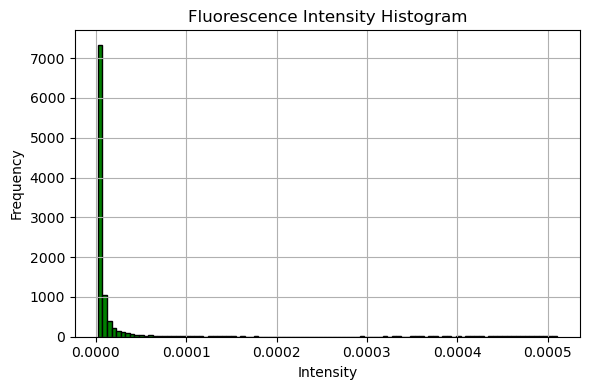

In [8]:
def draw_histogram(data, idx, data_type='cylinder'):

    if data_type == 'cylinder':
        data = data['fluorescence']
    elif data_type == 'phantom':
        data = data['fluorescence'][idx]
    elif data_type == 'dt':
        data = data['fluorescence'][idx]
    else:
        raise ValueError(f'Invalid data_type: {data_type}')

    d = data[:,:,0] # this is shape (101,101)
    pixels = d.ravel()

    plt.figure(figsize=(6, 4))
    plt.hist(pixels, bins=100, color='green', edgecolor='black')
    plt.title(f"Fluorescence Intensity Histogram")
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

draw_histogram(sample_cylinder_data_r1, 2, data_type='cylinder')


# Physics Value Calculations

## boundary condition

In [9]:
def getReff_Haskell(n_in, n_out=1.0):
    """
    Compute the effective reflection coefficient Reff using Fresnel integrals (Haskell et al.).

    Parameters
    ----------
    n_in : float
        Refractive index of the tissue
    n_out : float
        Refractive index of the outside medium (default: 1.0 for air)

    Returns
    -------
    Reff : float
        Effective reflection coefficient
    """
    oc = np.arcsin(n_out / n_in)
    o = np.linspace(0, oc, 2000)
    coso = np.cos(o)
    cosop = np.sqrt(1 - (n_in / n_out)**2 * np.sin(o)**2)

    r_fres1 = ((n_in * cosop - n_out * coso) / (n_in * cosop + n_out * coso))**2
    r_fres2 = ((n_in * coso - n_out * cosop) / (n_in * coso + n_out * cosop))**2
    r_fres = 0.5 * (r_fres1 + r_fres2)

    sin_o = np.sin(o)

    r_phi_int = 2 * sin_o * coso * r_fres
    r_phi = np.trapz(r_phi_int, o)

    r_j_int = 3 * sin_o * coso**2 * r_fres
    r_j = np.trapz(r_j_int, o)

    Reff = (r_phi + r_j) / (2 - r_phi + r_j)
    return Reff

In [10]:
def gtxDTBoundaryCondition(nrel, method='Groenhuis'):
    """
    Compute boundary correction constants for diffuse reflectance and fluence modeling.

    Parameters
    ----------
    nrel : float
        Relative refractive index (e.g., 1.4)
    method : str
        Method to compute internal reflectance. Options: 'Groenhuis' (default), 'Haskell'

    Returns
    -------
    Cnd : float
        Correction factor for fluence rate at boundary
    K : float
        Extrapolated boundary constant
    rid : float
        Internal diffuse reflectance
    """
    if nrel == 1.0:
        rid = 0.0
        K = 1.0
    else:
        if method == 'Groenhuis':
            # Empirical formula from Cuccia (2009), based on Groenhuis (1983)
            rid = -1.44 / (nrel**2) + 0.71 / nrel + 0.67 + 0.0636 * nrel
        elif method == 'Haskell':
            rid = getReff_Haskell(nrel)
        else:
            raise ValueError(f"Unsupported boundary method: {method}")
        K = (1 + rid) / (1 - rid)

    Cnd = 2 * K
    return Cnd, K, rid

## mueff

In [11]:
def compute_mueff(mu_a, mu_s, fx):
    """
    Compute the effective attenuation coefficient (mu_eff) used in diffusion theory.

    Parameters
    ----------
    mu_a : np.ndarray, shape (H, W)
        Absorption coefficient at excitation (mm⁻¹)
    mu_s : np.ndarray, shape (H, W)
        Reduced scattering coefficient at excitation (mm⁻¹)
    fx : np.ndarray, shape (F,)
        Spatial frequencies (mm⁻¹)

    Returns
    -------
    mu_eff : np.ndarray, shape (H, W, F)
        Effective attenuation coefficient at each pixel and frequency
    """

    # Diffusion coefficient D = 1 / (3 * (μₐ + μₛ′))
    mut = mu_a + mu_s  # shape (H, W)
    D = 1.0 / (3.0 * mut)  # shape (H, W)

    # Broadcasting with spatial frequencies
    mu_a_term = mu_a / D  # shape (H, W)
    mu_a_term = mu_a_term[:, :, np.newaxis]  # shape (H, W, 1)
    fx_term = (2 * np.pi * fx)**2  # shape (F,)

    mu_eff = np.sqrt(mu_a_term + fx_term[np.newaxis, np.newaxis, :])  # shape (H, W, F)

    return mu_eff

## fluence

In [12]:
def fluence_total(mu_a, mu_s, fx, z_vals, nrel=1.4, method='Cuccia'):
    """
    Compute fluence Φ(z, fx) at depth using spatial-frequency domain diffusion theory.

    Parameters
    ----------
    mu_a : np.ndarray, shape (H, W)
        Absorption coefficient
    mu_s : np.ndarray, shape (H, W)
        Reduced scattering coefficient
    fx : np.ndarray, shape (F,)
        Spatial frequencies (mm⁻¹)
    z_vals : np.ndarray, shape (Z,)
        Depths to evaluate fluence (mm)
    nrel : float
        Relative refractive index
    method : str
        Method for fluence calculation: 'Cuccia', 'Kim', or 'Gardner'

    Returns
    -------
    phi : np.ndarray, shape (H, W, Z, F)
        Fluence values at each pixel, depth, and spatial frequency
    """

    H, W = mu_a.shape
    F = len(fx)
    Z = len(z_vals)

    # Boundary condition constants
    Cnd, K, _ = gtxDTBoundaryCondition(nrel)

    mutr = mu_a + mu_s
    D = 1.0 / (3.0 * mutr)
    ap = mu_s / mutr

    # Compute effective attenuation coefficient
    mu_eff = compute_mueff(mu_a, mu_s, fx)

    # Expand for broadcasting
    z = z_vals[None, None, :, None]         # (1, 1, Z, 1)
    mu_eff = mu_eff[:, :, None, :]          # (H, W, 1, F)
    mutr = mutr[:, :, None, None]           # (H, W, 1, 1)
    ap = ap[:, :, None, None]               # (H, W, 1, 1)
    
    if method == 'Cuccia':
        # Cuccia model: valid for fx < 1/(3~4)utr
        A = 1/Cnd

        C0 = 3 * ap / (mu_eff**2 / mutr**2 - 1)
        C = - 3 * ap * (1 + 3*A) / ((mu_eff**2 / mutr**2 - 1) * (mu_eff / mutr + 3*A))
        phi = C0 * np.exp(-mutr * z) + C* np.exp(-mu_eff * z)  # (H, W, Z, F)

        return phi
    
    elif method == 'Kim':
        raise NotImplementedError("Kim model not implemented")
    
    elif method == 'Gardner':
        raise NotImplementedError("Gardner model not implemented")
    
    else:
        raise ValueError(f"Invalid method: {method}")

## Tef_z

In [13]:
def compute_Tef(mu_a_x, mu_s_x, mu_a_m, mu_s_m, fx, z_vals, nrel=1.4, fx_dependence=True, layer='top'):
    """
    Compute the depth-resolved transport kernel Tef(z, fx).

    Parameters
    ----------
    mu_a_x : np.ndarray, shape (H, W)
        Absorption at excitation
    mu_s_x : np.ndarray, shape (H, W)
        Scattering at excitation
    mu_a_m : np.ndarray, shape (H, W)
        Absorption at emission
    mu_s_m : np.ndarray, shape (H, W)
        Scattering at emission
    fx : np.ndarray, shape (F,)
        Spatial frequencies
    z_vals : np.ndarray, shape (Z,)
        Depths to integrate over
    nrel : float
        Relative refractive index
    fx_dependence : bool
        Whether emission fluence depends on fx (True for real data, False for sim)

    Returns
    -------
    Tef_z : np.ndarray, shape (H, W, Z, F)
        Depth-resolved transport kernel
    """

    # if layer == 'top' and z_vals[0] > z_vals[-1]:
    #     raise ValueError("For layer='top', z_vals must increase from surface to depth")
    # elif layer == 'bottom' and z_vals[0] < z_vals[-1]:
    #     raise ValueError("For layer='bottom', z_vals must decrease from depth to deeper layers")

    Cnd, _, _ = gtxDTBoundaryCondition(nrel)

    # Excitation fluence: Φ_x(z, fx)
    phi_x = fluence_total(mu_a_x, mu_s_x, fx, z_vals, nrel=nrel, method='Cuccia')  # (H, W, Z, F)

    # Emission fluence: Φ_m(z, fx) or Φ_m(z, f=0)
    if fx_dependence:
        phi_m = fluence_total(mu_a_m, mu_s_m, fx, z_vals, nrel=nrel, method='Cuccia')
    else:
        phi_m = fluence_total(mu_a_m, mu_s_m, np.array([0.0]), z_vals, nrel=nrel, method='Cuccia')
        phi_m = np.repeat(phi_m, len(fx), axis=3)  # replicate along fx dimension

    dz = np.gradient(z_vals)[None, None, :, None]  # (1, 1, Z, 1)
    product_term = phi_x * phi_m * dz

    if layer == 'top':
        Tef_z = np.cumsum(product_term, axis=2) / Cnd
    elif layer == 'bottom':
        Tef_z = np.cumsum(product_term[:, :, ::-1, :], axis=2)[:, :, ::-1, :] / Cnd
    else:
        raise ValueError(f"Invalid layer: {layer}")
    
    Tef = np.sum(product_term, axis=2) / Cnd
    
    return Tef, Tef_z, phi_x, phi_m

# Inverse

In [14]:
def interpolate_z_at_mval(m_val, z_vals, M_curve):
    """
    Find z such that M_curve(z) == m_val using linear interpolation.
    z_vals: shape (Nz,), e.g. np.linspace(0, 10, 100)
    M_curve: shape (Nz,), values of M_Z[i,j,:,fAC]
    """
    # Find where M_curve crosses m_val
    diff = M_curve - m_val
    sign_change = np.where(np.diff(np.sign(diff)) != 0)[0]

    if len(sign_change) == 0:
        return max(z_vals)  # No crossing found

    idx = sign_change[0]  # take first crossing
    x0, x1 = z_vals[idx], z_vals[idx+1]
    y0, y1 = M_curve[idx], M_curve[idx+1]

    # Linear interpolation
    z_interp = x0 + (m_val - y0) * (x1 - x0) / (y1 - y0)
    return z_interp

In [60]:
def inverse_fluorescence_depth(F, fx, mua_x, mus_x, mua_m, mus_m, nrel, numerical_vars):
    """
    Estimate depth and fluorescence yield from fluorescence SFDI images.

    Parameters
    ----------
    F : ndarray of shape (H, W, F)
        Measured fluorescence images at different spatial frequencies.
    fx : ndarray of shape (F,)
        Spatial frequencies.
    mua_x, mus_x : ndarray of shape (H, W)
        Absorption and scattering at excitation.
    mua_m, mus_m : ndarray of shape (H, W)
        Absorption and scattering at emission.
    nrel : float
        Relative refractive index.
    numerical_vars : dict
        Parameters: fxDependence, hFl, zDelta, layerFl

    Returns
    -------
    z_est : ndarray of shape (H, W)
        Estimated depth.
    qF_est : ndarray of shape (H, W)
        Estimated fluorescence yield.
    """

    fx_dependence = numerical_vars.get("fxDependence", True)
    hFl = numerical_vars.get("hFl", 20.0)
    zDelta = numerical_vars.get("zDelta", 0.05)
    depth_offset = numerical_vars.get("depth_offset", 0)
    layerFl = numerical_vars.get("layerFl", "top")

    # Depth range
    if layerFl == "bottom":
        # z_vals = np.arange(depth_offset, hFl + depth_offset, zDelta)
        z_vals = np.arange(0, hFl + depth_offset, zDelta)
    else:
        z_vals = np.arange(0, hFl, zDelta)

    # print(z_vals)

    Tef, Tef_z, phi_x, phi_m = compute_Tef(
        mua_x, mus_x,
        mua_m, mus_m,
        fx, z_vals,
        nrel=nrel,
        fx_dependence=fx_dependence,
        layer=layerFl
    )

    H, W, F_ = F.shape
    fDC = 0
    F_DC = F[..., fDC]
    # range_ac = range(1, F_)
    range_ac = range(1, 4)

    z_est = np.zeros((F_, H, W))
    qF_est = np.zeros((F_, H, W))

    M_Z = np.zeros((H, W, len(z_vals), F_))
    M_Z_Data = np.zeros((H, W, F_))

    for fAC in range_ac:
        F_AC = F[..., fAC]
        M_Z_Data[..., fAC] = np.nan_to_num(F_AC / F_DC, nan=0.0)
        M_Z[..., fAC] = Tef_z[..., fAC] / Tef_z[..., fDC]


        for i in range(H):
            for j in range(W):
                m_val = M_Z_Data[i, j, fAC]

                z_interp = interpolate_z_at_mval(m_val, z_vals, M_Z[i, j, :, fAC])
                z_est[fAC, i, j] += z_interp

                Tef_dc_interp = np.interp(z_interp, z_vals, Tef_z[i, j, :, fDC], left=1e-6, right=1e-6)
                qF_est[fAC, i, j] += F_DC[i, j] / Tef_dc_interp if Tef_dc_interp > 0 else 0.0

    z_est = np.average(z_est, axis=0)
    qF_est = np.average(qF_est, axis=0)

    return z_est, qF_est

# Tests

## depth estimation

In [61]:
def plot_depth(data, z_est, type='depth'):
    if type == 'depth':
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        vmin = min(data.get('depth').min(), z_est.min())
        vmax = max(data.get('depth').max(), z_est.max())
        print(vmin, vmax)
        im0 = ax[0].imshow(data.get('depth'), vmin=vmin, vmax=vmax)
        im1 = ax[1].imshow(z_est, vmin=vmin, vmax=vmax)
        ax[0].set_title('Depth')
        ax[1].set_title('Estimated Depth')
        cbar = fig.colorbar(im0, ax=ax[:], orientation='vertical')
        cbar.set_label('Depth (mm)')  # Optional
        plt.show()
    elif type == 'concentration':
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        vmin = min(data.get('concentration').min(), z_est.min())
        vmax = max(data.get('concentration').max(), z_est.max())
        im0 = ax[0].imshow(data.get('concentration'), vmin=vmin, vmax=vmax)
        im1 = ax[1].imshow(z_est, vmin=vmin, vmax=vmax)
        ax[0].set_title('Concentration')
        ax[1].set_title('Estimated Concentration')
        cbar = fig.colorbar(im0, ax=ax[:], orientation='vertical')
        cbar.set_label('Concentration (mg/ml)')  # Optional
        plt.show()

In [62]:
def run_numerical_solver(filepath, hFl, zDelta, layerFl, depth_offset, type_data, idx=None, fxDependence=True, extrapolation=False, eta=0.03, nrel=1.4, plot=True):
    
    if type_data == 'cylinder':
        str_info = filepath.split('/')[-1].split('.')[0].split('_')
        r = float(str_info[1][1])
        depth_offset = float(str_info[2][1:])
        if depth_offset > 10:
            depth_offset /= 10
        # hFl = float(str_info[0][1])

    if depth_offset > 0:
        layerFl = 'bottom'

    
    if type_data == 'cylinder':
        data = load_cylinder_data(filepath)
        sample_data = {
            'fluorescence': data['F'],
            'optical_props': data['OP'],
            'reflectance': data['RE'],
            'depth': data['DF'],
            'concentration': data['QF']
        }
    elif type_data == 'phantom':
        temp_data = load_phantom_data(phantom_data_path)
        phantom_data = {
            'fluorescence': temp_data['F'],
            'optical_props': temp_data['OP'],
            'reflectance': temp_data['RE'],
            'depth': temp_data['DF'],
            'concentration': temp_data['QF']
        }

        idx = idx if idx is not None else 0
        sample_data = {
            'fluorescence': phantom_data['fluorescence'][idx, :, :, :],
            'optical_props': phantom_data['optical_props'][idx, :, :, :],
            'reflectance': phantom_data['reflectance'][idx, :, :, :],
            'depth': phantom_data['depth'][idx, :, :],
            'concentration': phantom_data['concentration'][idx, :, :]
        }

        print("sample data ready")
    elif type_data == 'dt':
        data_list = load_dt_data(filepath)
        data = data_list[idx]
        sample_data = {
            'fluorescence': data['F'],
            'optical_props': data['OP'],
            'reflectance': data['RE'],
            'depth': data['DF'],
            'concentration': data['QF']
        }

    elif type_data == 'else':
        temp_data = load_phantom_data("data/sample_iceberg.mat")
        phantom_data = {
            'fluorescence': temp_data['F'],
            'optical_props': temp_data['OP'],
            'reflectance': temp_data['RE'],
            'depth': temp_data['DF'],
            'concentration': temp_data['QF']
        }

        sample_data = {
            'fluorescence': phantom_data['fluorescence'][:, :, :],
            'optical_props': phantom_data['optical_props'][:, :, :],
            'reflectance': phantom_data['reflectance'][:, :, :],
            'depth': phantom_data['depth'][:, :],
            'concentration': phantom_data['concentration'][:, :]
        }
    else:
        raise ValueError(f"Invalid data type: {type_data}")
    
    F = sample_data.get('fluorescence')
    op = sample_data.get('optical_props')

    mua_x = op[..., 0]
    mus_x = op[..., 1]
    if extrapolation:
        mua_m, mus_m = extrapolate_opt_prop(mua_x, mus_x, 630, 700, absorber='IndiaInk', scatterer='Intralipid')
    else:
        mua_m = mua_x
        mus_m = mus_x

    assert mua_m.shape == mua_x.shape
    assert mus_m.shape == mus_x.shape
    
    print(hFl,depth_offset,layerFl)
    numericalVars = {
        'fxDependence': fxDependence,
        'hFl': hFl,
        'zDelta': zDelta,
        'layerFl': layerFl,
        'depth_offset': depth_offset
    }

    z_est, qf_est = inverse_fluorescence_depth(F, fx, mua_x, mus_x, mua_m, mus_m, nrel, numericalVars)

    depth_pixel_count = np.sum(sample_data.get('depth') > 0)
    predicted_depth_pixel_count = np.sum(z_est > 0)

    gt_depth = sample_data.get('depth')
    if depth_offset > 0 and type_data == 'cylinder':
        gt_depth = np.where(gt_depth > 0, depth_offset, 0)
    elif depth_offset == 0 and type_data == 'cylinder':
        m = np.max(gt_depth)
        gt_depth = np.where(gt_depth > 0, m, 0)

    print(f"Average depth error is {np.sum(np.abs(z_est - gt_depth))/depth_pixel_count} mm")

    # print(f"Intersection of depth and estimated depth is {np.sum((gt_depth > 0) & (z_est > 0)) / predicted_depth_pixel_count}")

    test_data = {
        'depth': gt_depth,
        'concentration': sample_data.get('concentration')
    }
    plot_depth(test_data, z_est, type='depth')

    # return z_est, qf_est
    
    

20 0.0 top
Average depth error is 2.8635792211191213 mm
0.0 6.693881681240458


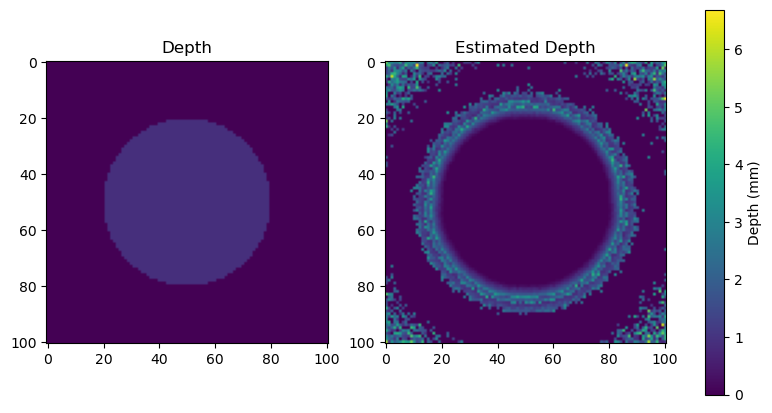

In [63]:
run_numerical_solver(
    filepath=f"data/cylinder/h1_r15_d0.mat",
    hFl=20,
    zDelta=0.01,
    layerFl='top',
    depth_offset=0,
    type_data='cylinder',
    idx=None,
    fxDependence=True,
    extrapolation=False,
)

## plot estimation

In [88]:
def plot_fluorescence_depth_vs_others(F, fx, mua_x, mus_x, mua_m, mus_m, nrel, numerical_vars):
    """
    Estimate depth and fluorescence yield from fluorescence SFDI images.

    Parameters
    ----------
    F : ndarray of shape (H, W, F)
        Measured fluorescence images at different spatial frequencies.
    fx : ndarray of shape (F,)
        Spatial frequencies.
    mua_x, mus_x : ndarray of shape (H, W)
        Absorption and scattering at excitation.
    mua_m, mus_m : ndarray of shape (H, W)
        Absorption and scattering at emission.
    nrel : float
        Relative refractive index.
    numerical_vars : dict
        Parameters: fxDependence, hFl, zDelta, layerFl

    Returns
    -------
    z_est : ndarray of shape (H, W)
        Estimated depth.
    qF_est : ndarray of shape (H, W)
        Estimated fluorescence yield.
    """

    fx_dependence = numerical_vars.get("fxDependence", True)
    hFl = numerical_vars.get("hFl", 20.0)
    zDelta = numerical_vars.get("zDelta", 0.05)
    depth_offset = numerical_vars.get("depth_offset", 0)
    layerFl = numerical_vars.get("layerFl", "top")

    # Depth range
    if layerFl == "bottom":
        # z_vals = np.arange(depth_offset, hFl + depth_offset, zDelta)
        z_vals = np.arange(0, hFl, zDelta)
    else:
        z_vals = np.arange(0, hFl, zDelta)

    # print(z_vals)

    Tef, Tef_z, phi_x, phi_m = compute_Tef(
        mua_x, mus_x,
        mua_m, mus_m,
        fx, z_vals,
        nrel=nrel,
        fx_dependence=fx_dependence,
        layer=layerFl
    )

    H, W, F_ = F.shape
    fDC = 0
    F_DC = F[..., fDC]
    # range_ac = range(1, F_)
    range_ac = [1, 2, 3, 4, 5]

    z_est = np.zeros((F_, H, W))
    qF_est = np.zeros((F_, H, W))

    M_Z = np.zeros((H, W, len(z_vals), F_))
    M_Z_Data = np.zeros((H, W, F_))

    for fAC in range_ac:
        F_AC = F[..., fAC]
        M_Z_Data[..., fAC] = np.nan_to_num(F_AC / F_DC, nan=0.0)
        M_Z[..., fAC] = Tef_z[..., fAC] / Tef_z[..., fDC]


        for i in range(H):
            for j in range(W):
                m_val = M_Z_Data[i, j, fAC]

                z_interp = interpolate_z_at_mval(m_val, z_vals, M_Z[i, j, :, fAC])
                z_est[fAC, i, j] += z_interp

                Tef_dc_interp = np.interp(z_interp, z_vals, Tef_z[i, j, :, fDC], left=1e-6, right=1e-6)
                qF_est[fAC, i, j] += F_DC[i, j] / Tef_dc_interp if Tef_dc_interp > 0 else 0.0

    z_est = np.average(z_est, axis=0)
    qF_est = np.average(qF_est, axis=0)

    np.random.seed(0)
    for _ in range(5):
        print("--------------------------------")
        x, y = np.random.randint(20, 80), np.random.randint(20, 80)
        print(f"x: {x}, y: {y}")

        fig = plt.figure(figsize=(15, 6))
        gs = gridspec.GridSpec(2, 5, figure=fig)

        # First row: span first two columns
        ax0 = fig.add_subplot(gs[0, 0])
        ax1 = fig.add_subplot(gs[0, 1])

        # Second row: all 5 columns
        ax2 = fig.add_subplot(gs[1, 0])
        ax3 = fig.add_subplot(gs[1, 1])
        ax4 = fig.add_subplot(gs[1, 2])
        ax5 = fig.add_subplot(gs[1, 3])
        ax6 = fig.add_subplot(gs[1, 4])

        # Optional: store axes in a list
        ax = [ax0, ax1, ax2, ax3, ax4, ax5, ax6]

        ax[0].plot(z_vals, Tef_z[y, x, :, 0])
        ax[0].plot(z_vals, Tef_z[y, x, :, 1])
        ax[0].plot(z_vals, Tef_z[y, x, :, 2])
        ax[0].plot(z_vals, Tef_z[y, x, :, 3])
        ax[0].plot(z_vals, Tef_z[y, x, :, 4])
        ax[0].plot(z_vals, Tef_z[y, x, :, 5])
        ax[0].legend(["fDC", "f=0.05", "f=0.1", "f=0.15", "f=0.2", "f=0.25"])
        ax[0].set_xlabel("Depth (mm)")
        ax[0].set_ylabel("Tef_z")

        ax[1].plot(z_vals, phi_x[y, x, :, 0])
        ax[1].plot(z_vals, phi_x[y, x, :, 1])
        ax[1].plot(z_vals, phi_x[y, x, :, 2])
        ax[1].plot(z_vals, phi_x[y, x, :, 3])
        ax[1].plot(z_vals, phi_x[y, x, :, 4])
        ax[1].plot(z_vals, phi_x[y, x, :, 5])
        ax[1].legend(["fDC", "f=0.05", "f=0.1", "f=0.15", "f=0.2", "f=0.25"])
        ax[1].set_xlabel("Depth (mm)")
        ax[1].set_ylabel("phi_x")

        temp_arr = np.ones((len(z_vals), 6))
        temp_arr[..., 0] = M_Z_Data[y, x, 0]
        temp_arr[..., 1] = M_Z_Data[y, x, 1]
        temp_arr[..., 2] = M_Z_Data[y, x, 2]
        temp_arr[..., 3] = M_Z_Data[y, x, 3]
        temp_arr[..., 4] = M_Z_Data[y, x, 4]
        temp_arr[..., 5] = M_Z_Data[y, x, 5]

        result1 = interpolate_z_at_mval(M_Z_Data[y, x, 1], z_vals, M_Z[y, x, :, 1])
        # ax[2].plot(z_vals, M_Z[y, x, :, 0])
        ax[2].plot(z_vals, M_Z[y, x, :, 1])
        ax[2].plot(z_vals, temp_arr[..., 0])
        ax[2].legend(["f=0.05", "m_val"])
        ax[2].set_xlabel("Depth (mm)")
        ax[2].set_ylabel("M_Z")

        result2 = interpolate_z_at_mval(M_Z_Data[y, x, 2], z_vals, M_Z[y, x, :, 2])
        # ax[3].plot(z_vals, M_Z[y, x, :, 0])
        ax[3].plot(z_vals, M_Z[y, x, :, 2])
        ax[3].plot(z_vals, temp_arr[..., 2])
        ax[3].legend(["f=0.1", "m_val"])
        ax[3].set_xlabel("Depth (mm)")
        ax[3].set_ylabel("M_Z")

        result3 = interpolate_z_at_mval(M_Z_Data[y, x, 3], z_vals, M_Z[y, x, :, 3])
        # ax[4].plot(z_vals, M_Z[y, x, :, 0])
        ax[4].plot(z_vals, M_Z[y, x, :, 3])
        ax[4].plot(z_vals, temp_arr[..., 3])
        ax[4].legend(["f=0.15", "m_val"])
        ax[4].set_xlabel("Depth (mm)")
        ax[4].set_ylabel("M_Z")
        ax[4].axvline(x=result3, color='r', linestyle='--', label='Interpolated Depth')


        result4 = interpolate_z_at_mval(M_Z_Data[y, x, 4], z_vals, M_Z[y, x, :, 4])
        # ax[5].plot(z_vals, M_Z[y, x, :, 0])
        ax[5].plot(z_vals, M_Z[y, x, :, 4])
        ax[5].plot(z_vals, temp_arr[..., 4])
        ax[5].legend(["f=0.2", "m_val"])
        ax[5].set_xlabel("Depth (mm)")
        ax[5].set_ylabel("M_Z")
        ax[5].axvline(x=result4, color='r', linestyle='--', label='Interpolated Depth')


        result5 = interpolate_z_at_mval(M_Z_Data[y, x, 5], z_vals, M_Z[y, x, :, 5])
        # ax[6].plot(z_vals, M_Z[y, x, :, 0])
        ax[6].plot(z_vals, M_Z[y, x, :, 5])
        ax[6].plot(z_vals, temp_arr[..., 5])
        ax[6].legend(["f=0.25", "m_val"])
        ax[6].set_xlabel("Depth (mm)")
        ax[6].set_ylabel("M_Z")
        ax[6].axvline(x=result5, color='r', linestyle='--', label='Interpolated Depth')

        print(result1, result2, result3, result4, result5)
        plt.show()



    return z_est, qF_est

--------------------------------
x: 64, y: 67
10.451467558794029 0 0 0 0


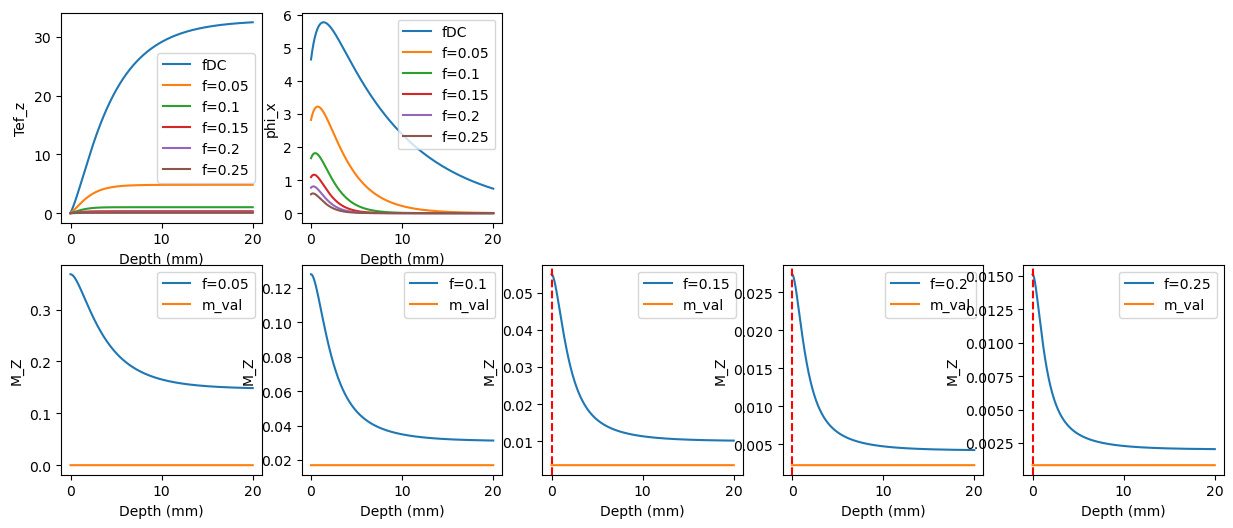

--------------------------------
x: 73, y: 20
0 0 0 9.616507723521595 12.73587889489704


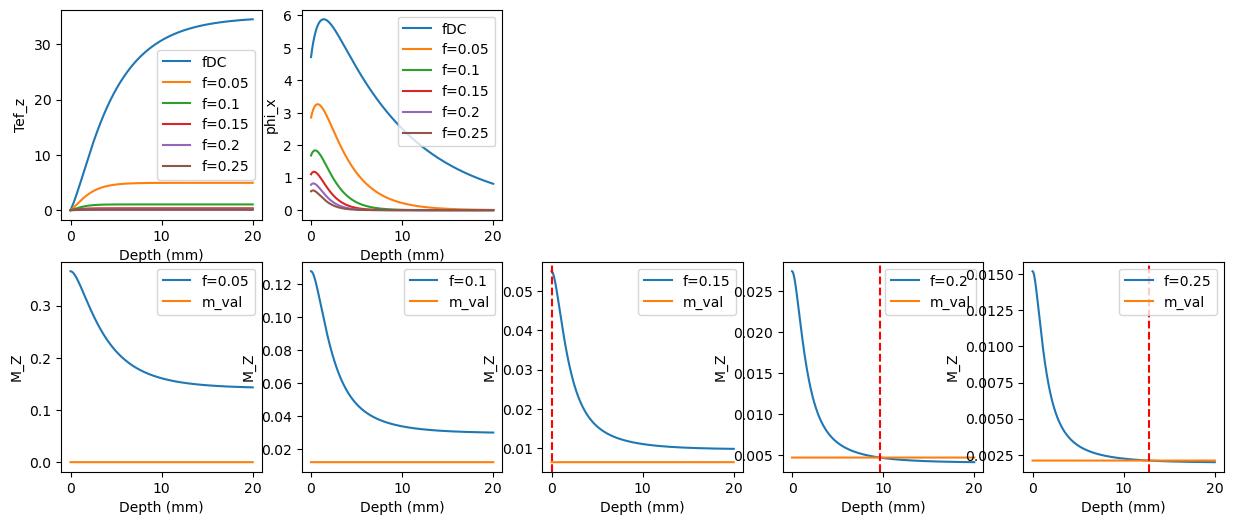

--------------------------------
x: 23, y: 79
0 0 0 3.710131429645182 4.8479823662031


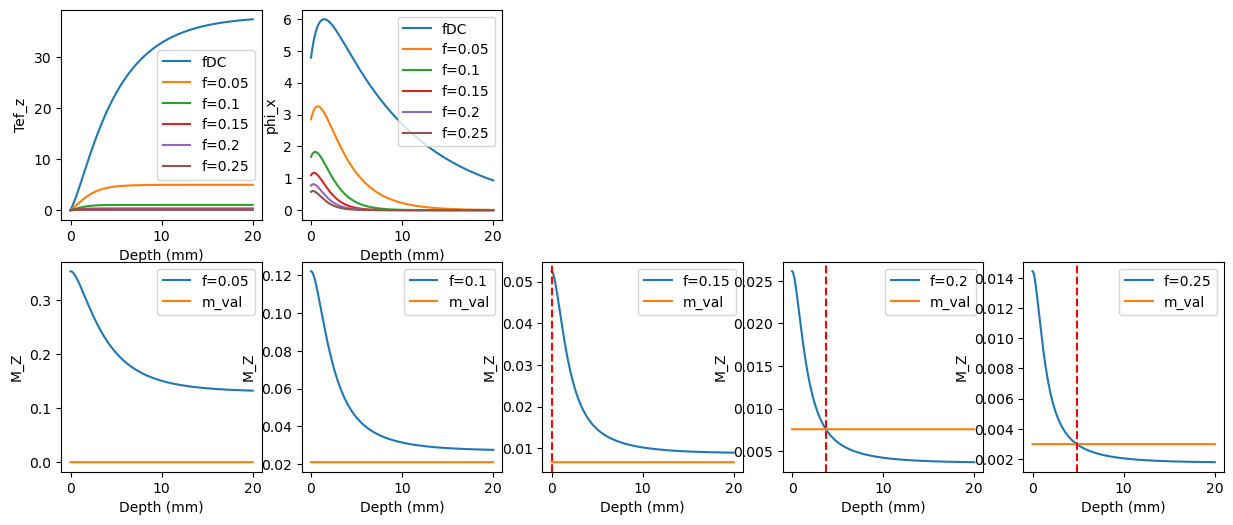

--------------------------------
x: 23, y: 59
0 0 0 0 6.689415491206657


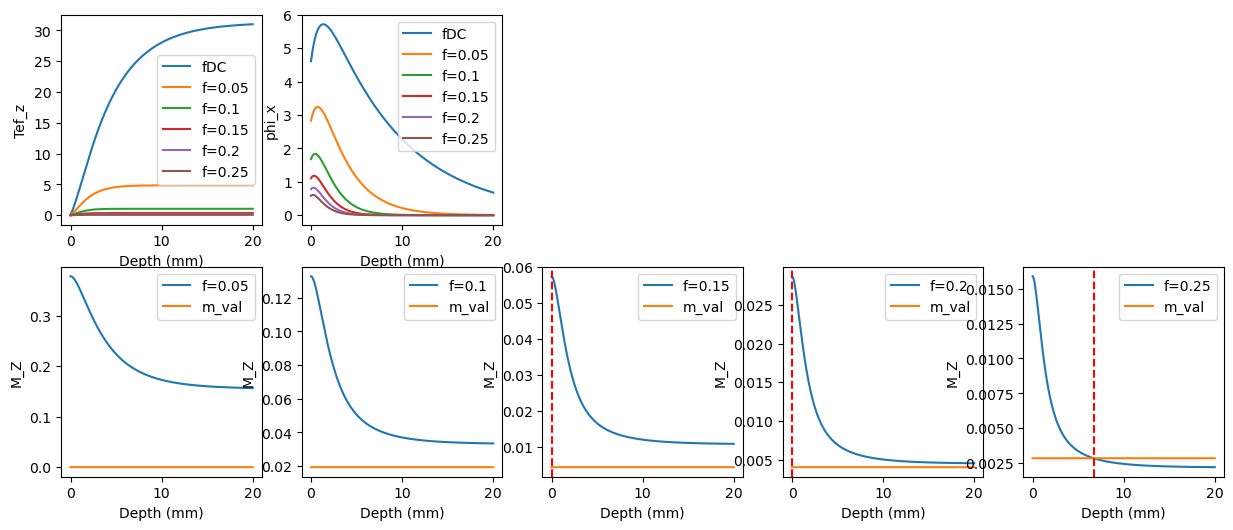

--------------------------------
x: 29, y: 39
15.677544429100283 0 0 0 0


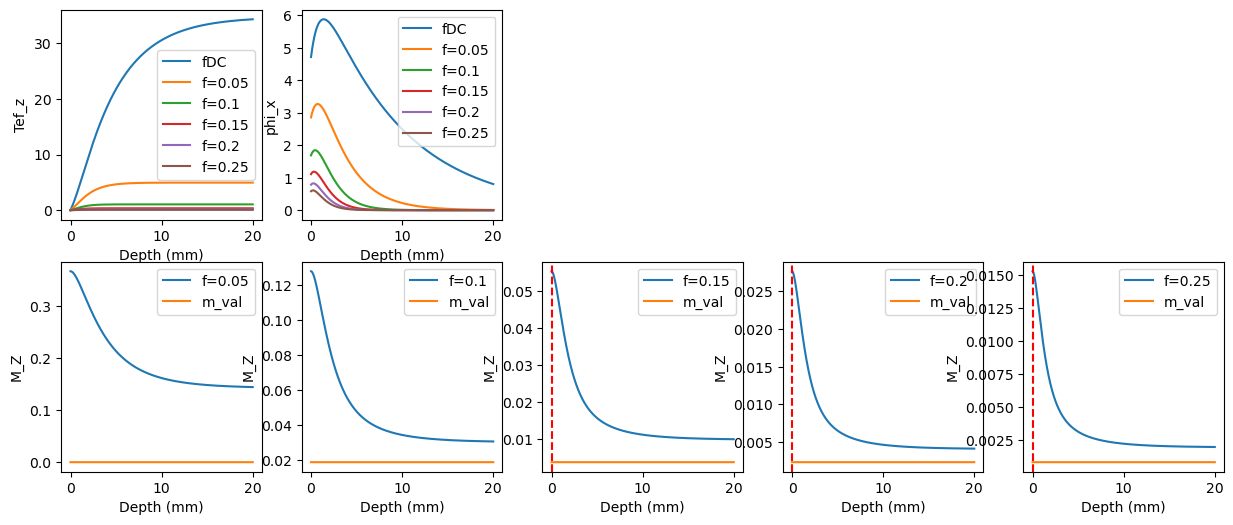

0.0 10.187724309194612


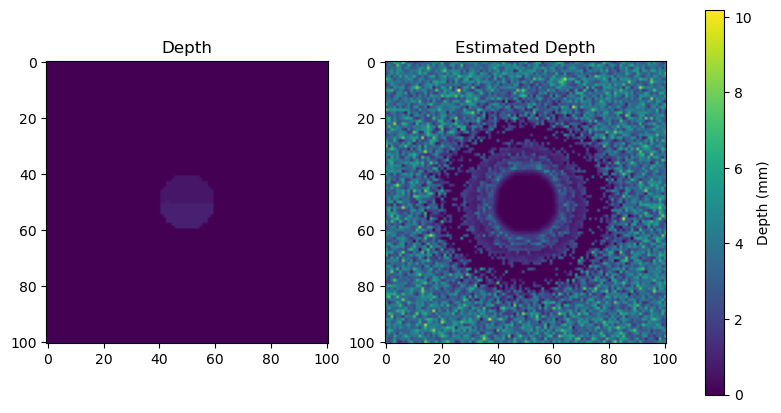

In [91]:
filepath = "data/cylinder/h1_r5_d0.mat"
data = load_cylinder_data(filepath)
sample_data = {
    'fluorescence': data['F'],
    'optical_props': data['OP'],
    'reflectance': data['RE'],
    'depth': data['DF'],
    'concentration': data['QF']
}

F = sample_data.get('fluorescence')
op = sample_data.get('optical_props')

mua_x = op[..., 0]
mus_x = op[..., 1]
# mua_m, mus_m = extrapolate_opt_prop(mua_x, mus_x, 630, 700, absorber='IndiaInk', scatterer='Intralipid')
mua_m = mua_x
mus_m = mus_x

fx = [0, 0.05, 0.1, 0.15, 0.2, 0.25] 
fx = np.array(fx)

numericalVars = {
    'fxDependence': True,
    'hFl': 20,
    'zDelta': 0.01,
    'layerFl': 'top',
    'depth_offset': 0,
}
z_est, q_est = plot_fluorescence_depth_vs_others(F, fx, mua_x, mus_x, mua_m, mus_m, 1.4, numericalVars)
plot_depth(sample_data, z_est, type='depth')

## test varying radius

1.0 0.0 top
5
Average depth error is 0.3819803278688525 mm
Intersection of depth and estimated depth is 0.5295138888888888
0.0 1.0


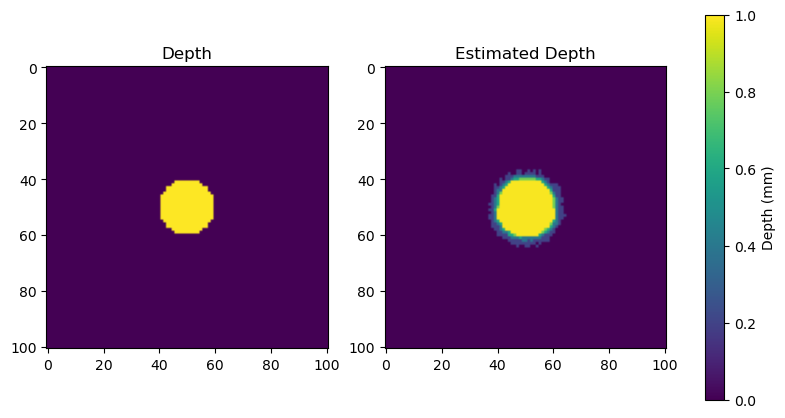

1.0 0.0 top
5
Average depth error is 0.10351325301204821 mm
Intersection of depth and estimated depth is 0.8063471502590673
0.0 1.0


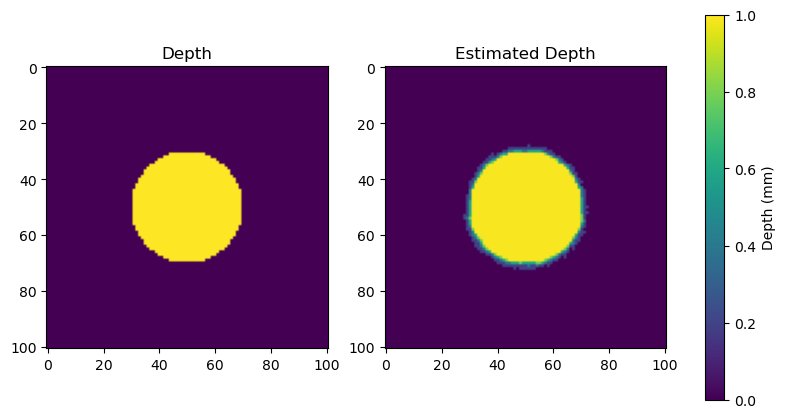

1.0 0.0 top
5
Average depth error is 0.06018725525097902 mm
Intersection of depth and estimated depth is 0.8813931597113273
0.0 1.0


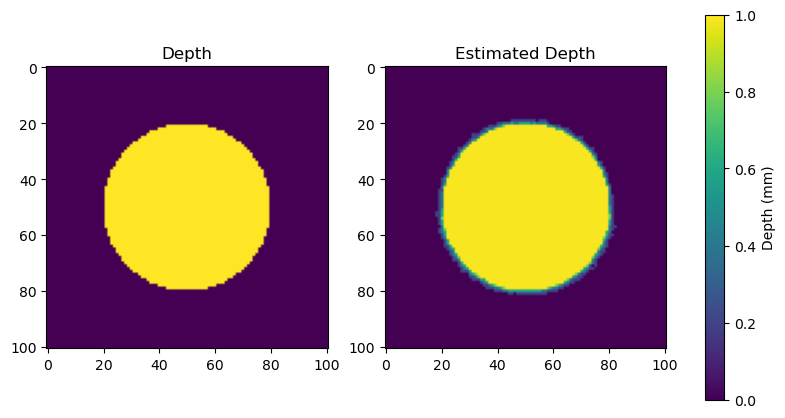

In [84]:
for i in ["5", "10", "15"]:
    run_numerical_solver(
        filepath=f"data/cylinder/h1_r{i}_d0.mat",
        hFl=5,
        zDelta=0.01,
        layerFl='top',
        depth_offset=0,
        type_data='cylinder',
        idx=None,
        fxDependence=True,
        extrapolation=False,
    )

## test varying depth

5.0 0.0 top
Average depth error is 0.7827483090067637 mm
Intersection of depth and estimated depth is 0.8659062885326757
0.0 5.0


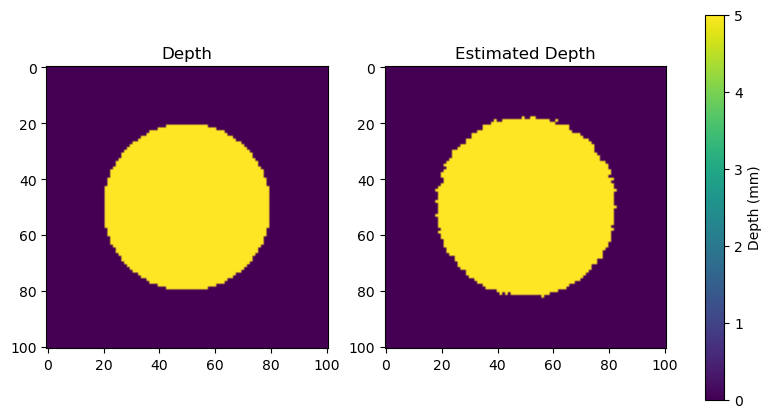

5.0 3.0 bottom
Average depth error is 21.036016375934494 mm
Intersection of depth and estimated depth is 0.2753651602784041
0.0 8.0


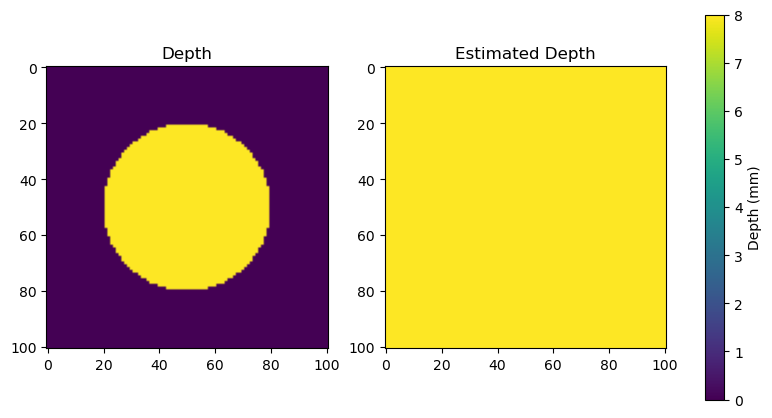

5.0 5.0 bottom
Average depth error is 26.299099323602704 mm
Intersection of depth and estimated depth is 0.2753651602784041
0.0 10.0


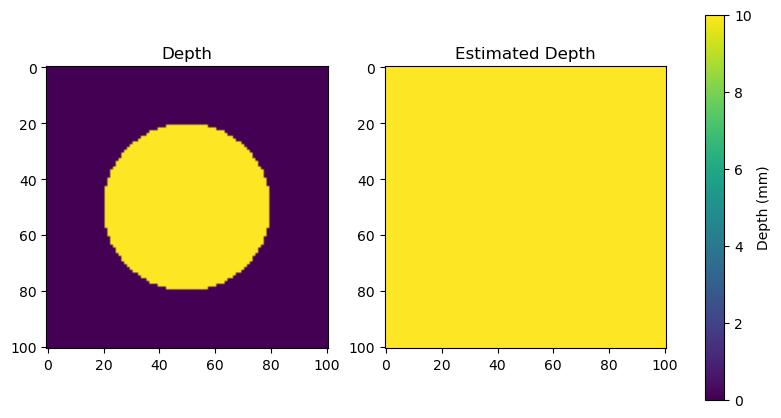

In [20]:
for i in ["0", "3", "5"]:
    run_numerical_solver(
        filepath=f"data/cylinder/h5_r15_d{i}.mat",
        hFl=5,
        zDelta=0.01,
        layerFl='top',
        depth_offset=0,
        type_data='cylinder',
        idx=None,
        fxDependence=True,
        extrapolation=False,
    )

## test varying heights

1.0 0.0 top
Average depth error is 0.10351325301204821 mm
Intersection of depth and estimated depth is 0.8063471502590673
0.0 1.0


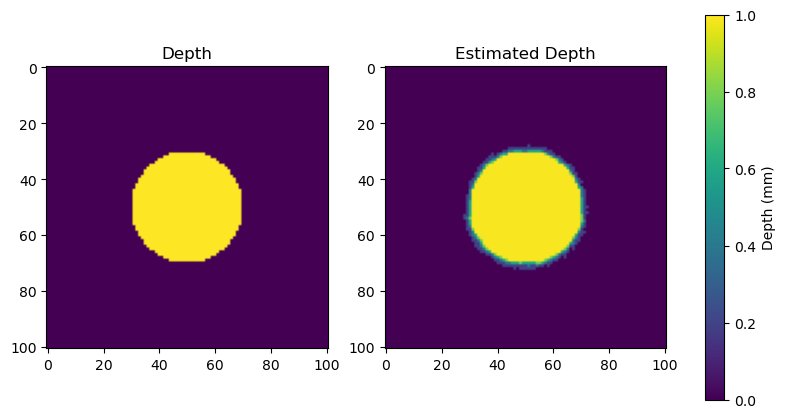

3.0 0.0 top
Average depth error is 0.43892690763052195 mm
Intersection of depth and estimated depth is 0.756838905775076
0.0 3.0


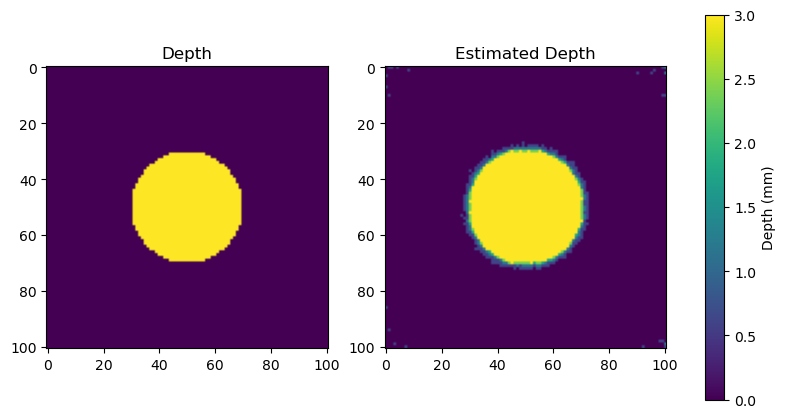

5.0 0.0 top
Average depth error is 4.99438875502008 mm
Intersection of depth and estimated depth is 0.2489502099580084
0.0 5.0


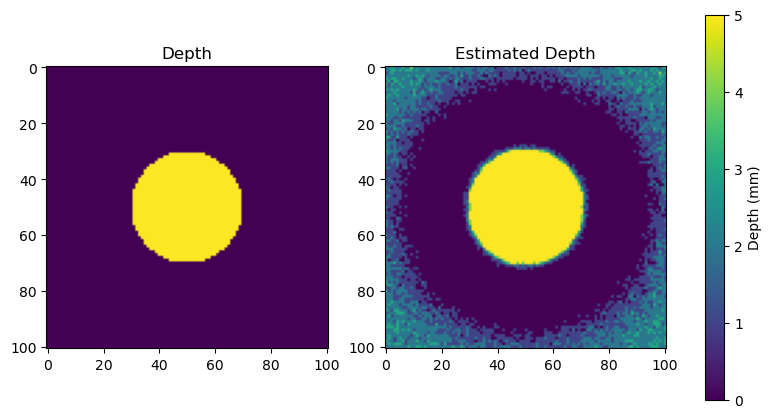

In [33]:
for i in ["1", "3", "5"]:
    
    run_numerical_solver(
        filepath=f"data/cylinder/h{i}_r10_d0.mat",
        hFl=5,
        zDelta=0.01,
        layerFl='top',
        depth_offset=0,
        type_data='cylinder',
        idx=None,
        fxDependence=True,
        extrapolation=False,
    )

## test submarin bottom up

5.0 2.0 bottom
Average depth error is 17.211521537913846 mm
Intersection of depth and estimated depth is 0.2753651602784041
0.0 7.0


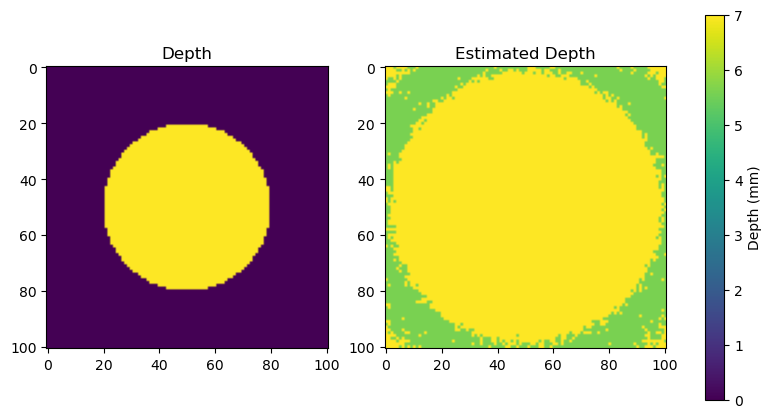

In [32]:
run_numerical_solver(
    filepath="data/cylinder/submarine_bottom/h5_r15_d2.mat",
    hFl=5,
    zDelta=0.01,
    layerFl='top',
    depth_offset=0,
    type_data='cylinder',
    idx=None,
    fxDependence=True,
    extrapolation=False,
)

5.0 2.0 bottom
Average depth error is 14.1463652545389 mm
Intersection of depth and estimated depth is 0.2753651602784041
0.0 7.0


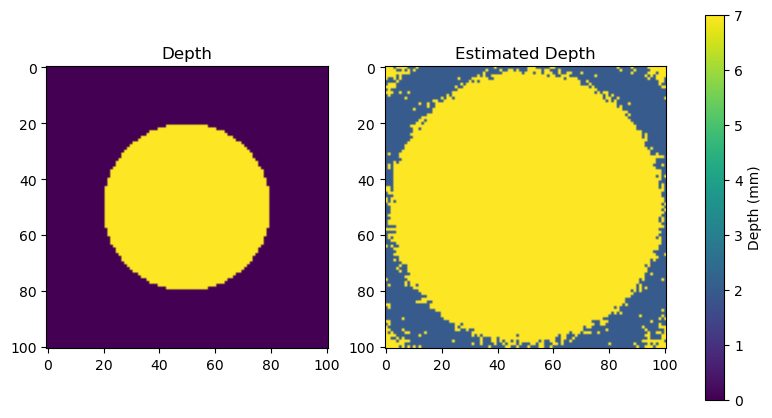

In [25]:
run_numerical_solver(
    filepath="data/cylinder/submarine_bottom/h5_r15_d2.mat",
    hFl=5,
    zDelta=0.01,
    layerFl='top',
    depth_offset=0,
    type_data='cylinder',
    idx=None,
    fxDependence=True,
    extrapolation=False,
)

5.0 2.5 bottom
Average depth error is 19.72024563901727 mm
Intersection of depth and estimated depth is 0.2753651602784041
0.0 7.5


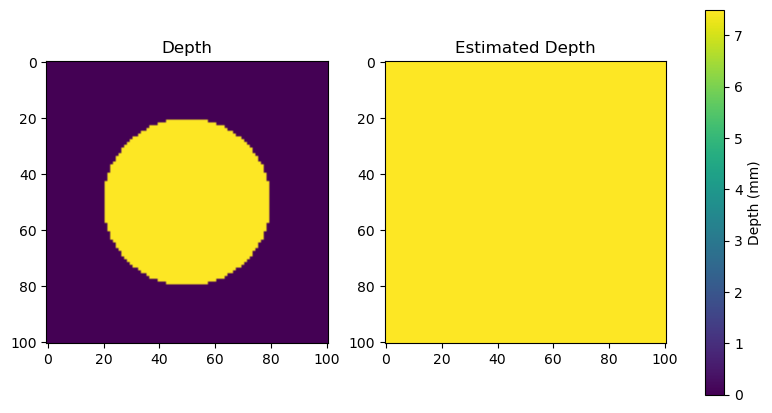

In [26]:
run_numerical_solver(
    filepath="data/cylinder/submarine_bottom/h5_r15_d25.mat",
    hFl=5,
    zDelta=0.01,
    layerFl='top',
    depth_offset=0,
    type_data='cylinder',
    idx=None,
    fxDependence=True,
    extrapolation=False,
)

5.0 3.0 bottom
Average depth error is 21.036016375934494 mm
Intersection of depth and estimated depth is 0.2753651602784041
0.0 8.0


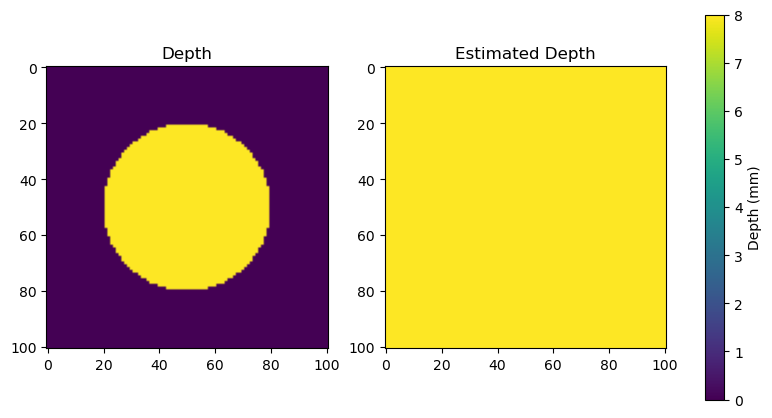

In [25]:
run_numerical_solver(
    filepath="data/cylinder/submarine_bottom/h5_r15_d3.mat",
    hFl=5,
    zDelta=0.01,
    layerFl='top',
    depth_offset=0,
    type_data='cylinder',
    idx=None,
    fxDependence=True,
    extrapolation=False,
)

3.0 1.0 bottom
Average depth error is 7.341997864008544 mm
Intersection of depth and estimated depth is 0.2753651602784041
0.0 4.0


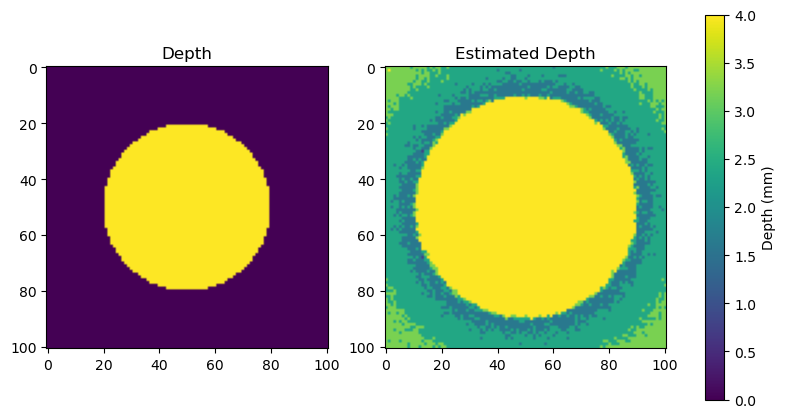

3.0 3.0 bottom
Average depth error is 15.772933428266287 mm
Intersection of depth and estimated depth is 0.2753651602784041
0.0 6.0


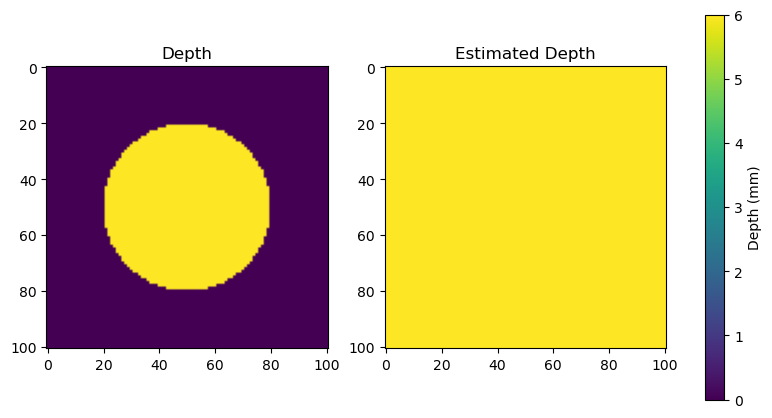

3.0 5.0 bottom
Average depth error is 21.036016375934494 mm
Intersection of depth and estimated depth is 0.2753651602784041
0.0 8.0


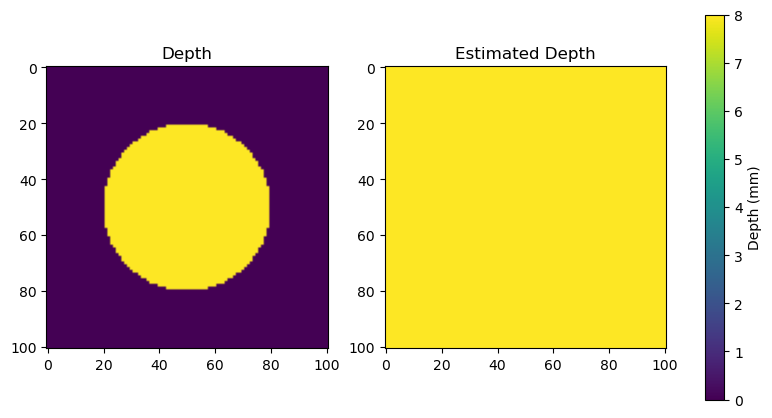

In [31]:
for i in ["1", "3", "5"]:
    run_numerical_solver(
        filepath=f"data/cylinder/submarine_bottom/h3_r15_d{i}.mat",
        hFl=5,
        zDelta=0.01,
        layerFl='top',
        depth_offset=0,
        type_data='cylinder',
        idx=None,
        fxDependence=True,
        extrapolation=False,
    )

## test phantom

sample data ready
14 2 bottom
Average depth error is 6.880740269274455 mm
Intersection of depth and estimated depth is nan
0.0 13.85


/tmp/ipykernel_832/173271778.py:111: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Intersection of depth and estimated depth is {np.sum((gt_depth > 0) & (z_est > 0)) / predicted_depth_pixel_count}")


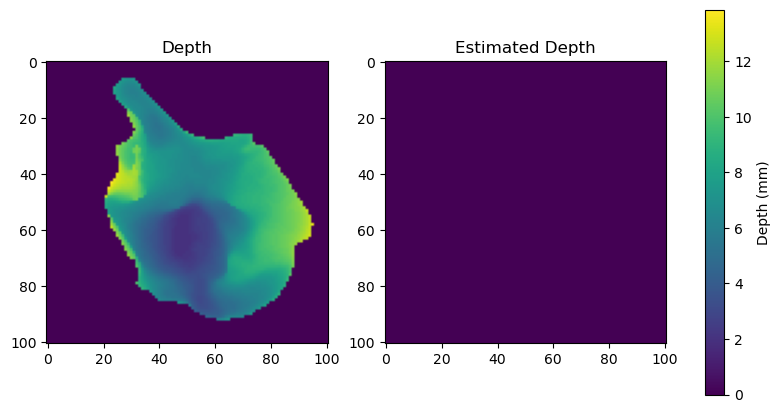

In [146]:
run_numerical_solver(
    filepath="data/phantom_data.mat",
    hFl=14,
    zDelta=0.01,
    layerFl='top',
    depth_offset=2,
    type_data='phantom',
    idx=None,
    fxDependence=True,
    extrapolation=False,
)

## test iceberg dt

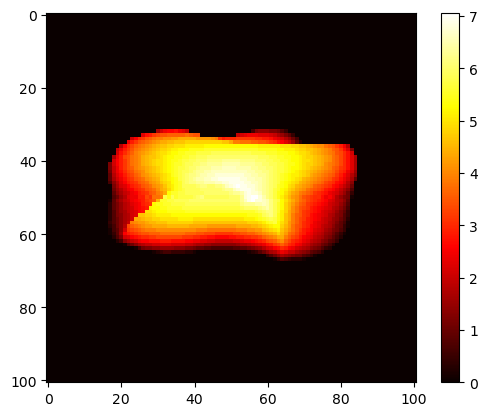

In [29]:
temp_data = load_phantom_data("data/sample_iceberg.mat")
phantom_data = {
    'fluorescence': temp_data['F'],
    'optical_props': temp_data['OP'],
    'reflectance': temp_data['RE'],
    'depth': temp_data['DF'],
    'concentration': temp_data['QF']
}

sample_phantom_data = {
    'fluorescence': phantom_data['fluorescence'][:, :, :],
    'optical_props': phantom_data['optical_props'][:, :, :],
    'reflectance': phantom_data['reflectance'][:, :, :],
    'depth': phantom_data['depth'][:, :],
    'concentration': phantom_data['concentration'][:, :]
}

draw_img(sample_phantom_data, type='depth', data_type='phantom')

20 0 top
Average depth error is 25.458728316581155 mm
Intersection of depth and estimated depth is 0.4723451327433628
0.0 19.995


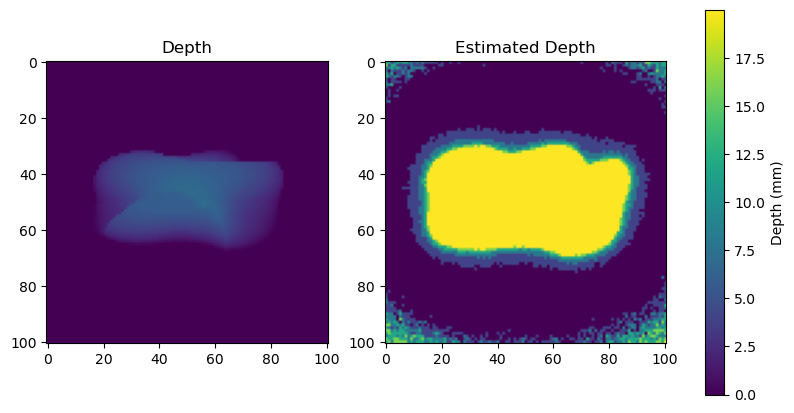

In [82]:
run_numerical_solver(
    filepath="data/sample_iceberg.mat",
    hFl=20,
    zDelta=0.005,
    layerFl='top',
    depth_offset=0,
    type_data='else',
    idx=None,
    fxDependence=True,
    extrapolation=True,
)

# Forward model

## reflectance calculation

In [16]:
def compute_reflectance_total(mu_a, mu_s, fx, nrel=1.4, method='Cuccia'):    
    """
    Compute diffuse reflectance R_d using the Cuccia model for spatial-frequency domain imaging.

    Parameters:
    - mu_a: Absorption coefficient (H, W)
    - mu_s: Reduced scattering coefficient (H, W)
    - fx: Spatial frequencies (F,) or scalar
    - nrel: Relative refractive index (default = 1.4)

    Returns:
    - Rd: Diffuse reflectance (H, W, F)
    """

    mu_tr = mu_a + mu_s
    ap = mu_s / mu_tr

    # Expand dimensions for broadcasting
    mu_tr = mu_tr[..., np.newaxis]  # (H, W, 1)
    ap = ap[..., np.newaxis]        # (H, W, 1)

    mu_eff = compute_mueff(mu_a, mu_s, fx)

    Cnd, _, _ = gtxDTBoundaryCondition(nrel)
    A = 1/Cnd

    if method == 'Cuccia':
        Rd = 3 * A * ap / ((mu_eff**2 / mu_tr**2 + 1) * (mu_eff / mu_tr + 3 * A))
    elif method == 'Kim':
        raise NotImplementedError("Kim model not implemented")
    elif method == 'Gardner':
        raise NotImplementedError("Gardner model not implemented")
    else:
        raise ValueError(f"Invalid method: {method}")
    
    return Rd
    


## fluorescence calculation

In [17]:
def compute_fluorescence_total(mua_x, mus_x, mua_m, mus_m, muaf_x, eta, nrel, fx, z_vals):
    """
    Compute total fluorescence using SFDI forward model.

    Parameters:
    - mua_x, mus_x: Absorption and scattering at excitation
    - mua_m, mus_m: Absorption and scattering at emission
    - muaf_x: Fluorophore absorption at excitation
    - eta: Quantum efficiency
    - nrel: Relative index of refraction
    - fx: Spatial frequencies (F,)
    - z_vals: Depths to evaluate fluence (mm)

    Returns:
    - F: Total fluorescence
    - R_x: Reflectance at excitation
    - R_m: Reflectance at emission

    """

    Tef, _, _, _ = compute_Tef(
        mua_x, mus_x,
        mua_m, mus_m,
        fx, z_vals,
        nrel=nrel,
        fx_dependence=True,
        layer='top' # or 'bottom' depends on the z_vals
    )

    qF = eta * muaf_x[..., np.newaxis] # (H, W, 1)
    F = qF * Tef

    R_x = compute_reflectance_total(mua_x, mus_x, fx, nrel=nrel)
    R_m = compute_reflectance_total(mua_m, mus_m, fx, nrel=nrel)

    return F, R_x, R_m

## test forward

In [22]:
def run_forward_simulation(filepath, muaf_m, muaf_x, eta, nrel, fx, depth_offset, hFl, data_type, idx=None, extrapolation=False):

    if data_type == 'cylinder':
        data = load_cylinder_data(filepath)
        sample_data = {
            'fluorescence': data['F'],
            'optical_props': data['OP'],
            'reflectance': data['RE'],
            'depth': data['DF'],
            'concentration': data['QF']
        }
    elif data_type == 'phantom':
        data_list = load_phantom_data(filepath)
        data = data_list[idx]
        sample_data = {
            'fluorescence': data['F'],
            'optical_props': data['OP'],
            'reflectance': data['RE'],
            'depth': data['DF'],
            'concentration': data['QF']
        }
    elif data_type == 'dt':
        data_list = load_dt_data(filepath)
        data = data_list[idx]
        sample_data = {
            'fluorescence': data['F'],
            'optical_props': data['OP'],
            'reflectance': data['RE'],
            'depth': data['DF'],
            'concentration': data['QF']
        }
    else:
        raise ValueError(f"Invalid data type: {data_type}")
    
    F = sample_data.get('fluorescence')
    op = sample_data.get('optical_props')
    
    mua_x = op[..., 0]
    mus_x = op[..., 1]

    if extrapolation:
        mua_m, mus_m = extrapolate_opt_prop(mua_x, mus_x, 630, 700, absorber='IndiaInk', scatterer='Intralipid')
    else:
        mua_m = mua_x
        mus_m = mus_x

    if depth_offset > 0:
        z_vals = np.arange(depth_offset, hFl + depth_offset, 0.05)
    else:
        z_vals = np.arange(0, hFl, 0.05)
    
    F_est, Rx_est, Rm_est = compute_fluorescence_total(mua_x, mus_x, mua_m, mus_m, muaf_x, eta, nrel, fx, z_vals)

    assert F_est.shape == F.shape
    assert Rx_est.shape == sample_data.get('reflectance').shape
    assert Rm_est.shape == sample_data.get('reflectance').shape

    test_data = {
        'fluorescence': F_est,
        'reflectance': Rx_est,
    }

    draw_img(sample_data, type='fluorescence', data_type=data_type)
    draw_img(test_data, type='fluorescence', data_type=data_type)

    draw_img(sample_data, type='reflectance', data_type=data_type)
    draw_img(test_data, type='reflectance', data_type=data_type)



    return F_est, Rx_est, Rm_est
    
    

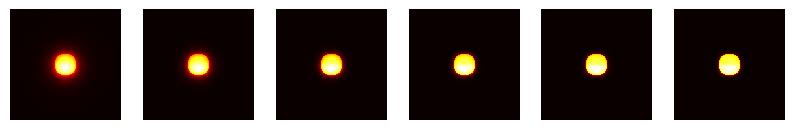

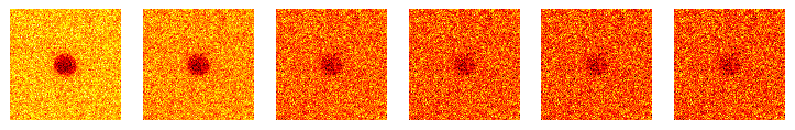

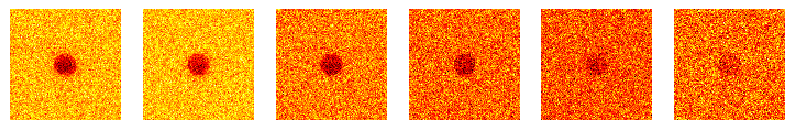

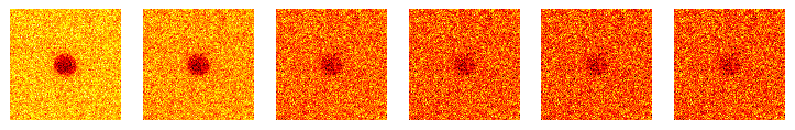

(array([[[4.31366728e-03, 1.47611192e-03, 4.72082457e-04, 1.88613101e-04,
          8.81024674e-05, 4.60226244e-05],
         [4.35149978e-03, 1.49027876e-03, 4.77742862e-04, 1.91185372e-04,
          8.94028284e-05, 4.67385326e-05],
         [4.33612654e-03, 1.49089328e-03, 4.78555929e-04, 1.91620530e-04,
          8.96360846e-05, 4.68705604e-05],
         ...,
         [4.20008876e-03, 1.50129621e-03, 4.88577922e-04, 1.96875433e-04,
          9.24362383e-05, 4.84523972e-05],
         [4.34989442e-03, 1.47725115e-03, 4.71449481e-04, 1.88200929e-04,
          8.78696787e-05, 4.58878102e-05],
         [4.20282475e-03, 1.47101828e-03, 4.73410538e-04, 1.89605653e-04,
          8.86814186e-05, 4.63623939e-05]],
 
        [[4.22066765e-03, 1.46731573e-03, 4.70953111e-04, 1.88375235e-04,
          8.80369025e-05, 4.60014138e-05],
         [4.22973081e-03, 1.48391423e-03, 4.78818421e-04, 1.92095204e-04,
          8.99469143e-05, 4.70611327e-05],
         [4.37118005e-03, 1.52125406e-03, 4.923

In [23]:
run_forward_simulation(
    filepath=cylinder_data_path_r1,
    muaf_m = np.array([0.033]),
    muaf_x = np.array([0.033]),
    eta = 0.03,
    nrel = 1.4,
    fx = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25]),
    depth_offset = 0,
    hFl = 1,
    data_type = 'cylinder',
    idx = None,
    extrapolation = False
)